# Caso carvana: Analisis de datos 

Carvana es una empresa estadounidense que se dedica a la venta online de coches usados, ofreciendo una experiencia innovadora y cómoda a los clientes, que pueden elegir entre miles de vehículos, financiarlos, comprarlos y recibirlos en su casa o en una de sus máquinas expendedoras.

El caso de Carvana Don’t Get Kicked es una competencia de Kaggle que consiste en predecir si un coche comprado en una subasta es una buena o mala compra, basándose en una serie de variables que describen el coche, como el año, el modelo, el color, el precio, etc. El objetivo es crear un modelo de clasificación que pueda identificar los coches que tienen problemas graves o defectos que impiden su venta a los clientes, es decir, los coches que son un “limón”. El conjunto de datos contiene información de más de 70.000 coches, de los cuales el 12% son malas compras.

## Parametros:

* RefId: Es el identificador único de cada coche en el conjunto de datos.
* IsBadBuy: Es la variable objetivo, que indica si el coche es una buena o mala compra. Tiene dos valores posibles: 0 (buena compra) o 1 (mala compra).
* PurchDate: Es la fecha de compra del coche.
* Auction: Es el nombre de la subasta donde se compró el coche.
* VehYear: Es el año de fabricación del coche.
* VehicleAge: Es la edad del coche en años, calculada como la diferencia entre el año de compra y el año de fabricación.
* Make: Es la marca del coche.
* Model: Es el modelo del coche.
* Trim: Es el nivel de equipamiento del coche, que indica las características y opciones que tiene el coche. Por ejemplo, LX, EX, SE, etc.
* SubModel: Es el submodelo del coche, que indica una variación específica dentro del modelo. Por ejemplo, 4D SEDAN, 2D COUPE, etc.
* Color: Es el color exterior del coche.
* Transmission: Es el tipo de transmisión del coche. Tiene dos valores posibles: AUTO (automática) o MANUAL (manual).
* WheelTypeID: Es el identificador del tipo de rueda del coche.
* WheelType: Es el tipo de rueda del coche. Tiene tres valores posibles: Alloy (aleación), Covers (tapacubos) o Special (especial).
* VehOdo: Es el odómetro del coche, que indica la distancia recorrida por el coche en millas.
* Nationality: Es la nacionalidad del coche, que indica el país de origen del fabricante.
* Size: Es el tamaño del coche, que indica la categoría a la que pertenece según sus dimensiones. Por ejemplo, SMALL, MEDIUM, LARGE, etc.
* TopThreeAmericanName: Es el nombre de la marca del coche, agrupado en las tres principales marcas americanas. Tiene cuatro valores posibles: GM, CHRYSLER, FORD o OTHER.
* MMRAcquisitionAuctionAveragePrice: Es el precio promedio del coche en la subasta de adquisición, según el MMRA (Manheim Market Report).
* MMRAcquisitionAuctionCleanPrice: Es el precio limpio del coche en la subasta de adquisición, según el MMRA. El precio limpio es el precio del coche sin tener en cuenta los daños o defectos.
* MMRAcquisitionRetailAveragePrice: Es el precio promedio del coche en el mercado minorista, según el MMRA.
* MMRAcquisitonRetailCleanPrice: Es el precio limpio del coche en el mercado minorista, según el MMRA.
* MMRCurrentAuctionAveragePrice: Es el precio promedio del coche en la subasta actual, según el MMRA.
* MMRCurrentAuctionCleanPrice: Es el precio limpio del coche en la subasta actual, según el MMRA.
* MMRCurrentRetailAveragePrice: Es el precio promedio del coche en el mercado minorista actual, según el MMRA.
* MMRCurrentRetailCleanPrice: Es el precio limpio del coche en el mercado minorista actual, según el MMRA.
* PRIMEUNIT: Es una variable que indica si el coche es una unidad principal, es decir, si tiene una alta demanda y un alto valor. Tiene dos valores posibles: YES o NO.
* AUCGUART: Es una variable que indica si el coche tiene una garantía de la subasta. Tiene tres valores posibles: GREEN, RED o NULL.
* BYRNO: Es el número del comprador que compró el coche en la subasta.
* VNZIP1: Es el código postal donde se compró el coche.
* VNST: Es el estado donde se compró el coche.
* VehBCost: Es el coste del coche para el comprador, incluyendo las tasas de la subasta.
* IsOnlineSale: Es una variable que indica si el coche se compró online o no. Tiene dos valores posibles: 0 (no) o 1 (sí).
* WarrantyCost: Es el coste de la garantía del coche para el comprador.


## Descarga del fichero
Archivo: training_car.csv

https://www.kaggle.com/datasets/salilchitnis/carvana

In [1]:
import pandas as pd
import numpy as np
import altair as alt; alt.data_transformers.enable("vegafusion")
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


In [2]:
df = pd.read_csv("training_car.csv", index_col="RefId")

df

IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
RefId                                                                
1             0  12/7/2009   ADESA     2006           3      MAZDA   
2             0  12/7/2009   ADESA     2004           5      DODGE   
3             0  12/7/2009   ADESA     2005           4      DODGE   
4             0  12/7/2009   ADESA     2004           5      DODGE   
5             0  12/7/2009   ADESA     2005           4       FORD   
...         ...        ...     ...      ...         ...        ...   
73010         1  12/2/2009   ADESA     2001           8    MERCURY   
73011         0  12/2/2009   ADESA     2007           2  CHEVROLET   
73012         0  12/2/2009   ADESA     2005           4       JEEP   
73013         0  12/2/2009   ADESA     2006           3  CHEVROLET   
73014         0  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color  ...  \
RefId                                                        ...   
1                    MAZDA3    i         4D SEDAN I     RED  ...   
2       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE  ...   
3                STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON  ...   
4                      NEON  SXT           4D SEDAN  SILVER  ...   
5                     FOCUS  ZX3       2D COUPE ZX3  SILVER  ...   
...                     ...  ...                ...     ...  ...   
73010                 SABLE   GS        4D SEDAN GS   BLACK  ...   
73011             MALIBU 4C   LS        4D SEDAN LS  SILVER  ...   
73012  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  SILVER  ...   
73013                IMPALA   LS        4D SEDAN LS   WHITE  ...   
73014                MAZDA6    s         4D SEDAN S  SILVER  ...   

      MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice PRIMEUNIT  \
RefId                                                                      
1                          11597.0                     12409.0       NaN   
2                          11374.0                     12791.0       NaN   
3                           7146.0                      8702.0       NaN   
4                           4375.0                      5518.0       NaN   
5                           6739.0                      7911.0       NaN   
...                            ...                         ...       ...   
73010                       4836.0                      5937.0       NaN   
73011                      10151.0                     11652.0       NaN   
73012                      11831.0                     14402.0       NaN   
73013                      10099.0                     11228.0       NaN   
73014                      11954.0                     13246.0       NaN   

       AUCGUART  BYRNO VNZIP1 VNST  VehBCost  IsOnlineSale  WarrantyCost  
RefId                                                                     
1           NaN  21973  33619   FL    7100.0             0          1113  
2           NaN  19638  33619   FL    7600.0             0          1053  
3           NaN  19638  33619   FL    4900.0             0          1389  
4           NaN  19638  33619   FL    4100.0             0           630  
5           NaN  19638  33619   FL    4000.0             0          1020  
...         ...    ...    ...  ...       ...           ...           ...  
73010       NaN  18111  30212   GA    4200.0             0           993  
73011       NaN  18881  30212   GA    6200.0             0          1038  
73012       NaN  18111  30212   GA    8200.0             0          1893  
73013       NaN  18881  30212   GA    7000.0             0          1974  
73014       NaN  18111  30212   GA    8000.0             0          1313  

[72983 rows x 33 columns]

In [3]:
#mover la columna "IsBadBuy" al final del Dataset. la columna es la salida de los diferentes paratametros
column_IsBadBuy=df.pop("IsBadBuy")
df["IsBadBuy"]=column_IsBadBuy
df.sample(10)

PurchDate  Auction  VehYear  VehicleAge        Make  \
RefId                                                        
18637  4/14/2009    OTHER     2004           5   CHEVROLET   
5301   1/12/2010  MANHEIM     2007           3         KIA   
5227   12/1/2009  MANHEIM     2006           3      NISSAN   
51250  3/25/2009  MANHEIM     2006           3     PONTIAC   
49807   7/1/2009    OTHER     2005           4   CHEVROLET   
4582   2/23/2010  MANHEIM     2003           7  OLDSMOBILE   
47063  7/28/2009  MANHEIM     2005           4       DODGE   
4991   7/10/2009  MANHEIM     2005           4       DODGE   
58831  8/18/2010  MANHEIM     2006           4         KIA   
69708  6/10/2009    ADESA     2004           5        FORD   

                      Model Trim          SubModel   Color Transmission  ...  \
RefId                                                                    ...   
18637   VENTURE FWD V6 3.4L   LS    PASSENGER 3.4L    BLUE         AUTO  ...   
5301                SPECTRA   EX       4D SEDAN EX  SILVER         AUTO  ...   
5227                 MAXIMA   SE       4D SEDAN SE  SILVER         AUTO  ...   
51250   G6 4C 2.4L I4 MFI /  Bas       4D SEDAN SE     RED         AUTO  ...   
49807   EQUINOX AWD V6 3.4L   LT         4D SUV LT   BEIGE         AUTO  ...   
4582               ALERO V6   GL      2D COUPE GL2  SILVER         AUTO  ...   
47063  MAGNUM V6 3.5L V6 MP  SXT     WAGON SXT AWD   GREEN         AUTO  ...   
4991   STRATUS V6 2.7L V6 M  SXT  4D SEDAN SXT FFV    GREY         AUTO  ...   
58831               SPECTRA   EX          4D SEDAN   BLACK         AUTO  ...   
69708    TAURUS 3.0L V6 EFI  SES      4D SEDAN SES    GREY         AUTO  ...   

       MMRCurrentRetailCleanPrice PRIMEUNIT  AUCGUART  BYRNO VNZIP1 VNST  \
RefId                                                                      
18637                      5941.0       NaN       NaN  20928  37421   TN   
5301                      10813.0       NaN       NaN    835  85040   AZ   
5227                      17555.0       NaN       NaN    835  85040   AZ   
51250                      8496.0       NaN       NaN  22916  80011   CO   
49807                     11972.0       NaN       NaN    835  85009   AZ   
4582                       5415.0       NaN       NaN   8655  60440   IL   
47063                     11750.0       NaN       NaN  20833  75050   TX   
4991                       7537.0       NaN       NaN  99750  85040   AZ   
58831                      9762.0       NaN       NaN  20234  98064   WA   
69708                      5109.0       NaN       NaN  21053  85226   AZ   

       VehBCost  IsOnlineSale  WarrantyCost  IsBadBuy  
RefId                                                  
18637    4900.0             0          3910         0  
5301     6290.0             0           462         0  
5227    10640.0             0          1155         0  
51250    7005.0             0           923         0  
49807    8895.0             0          1506         0  
4582     4795.0             0          2712         0  
47063    7840.0             0          1857         0  
4991     5400.0             0           975         0  
58831    6550.0             0           533         0  
69708    4150.0             0           920         0  

[10 rows x 33 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72983 entries, 1 to 73014
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          72983 non-null  object 
 1   Auction                            72983 non-null  object 
 2   VehYear                            72983 non-null  int64  
 3   VehicleAge                         72983 non-null  int64  
 4   Make                               72983 non-null  object 
 5   Model                              72983 non-null  object 
 6   Trim                               70623 non-null  object 
 7   SubModel                           72975 non-null  object 
 8   Color                              72975 non-null  object 
 9   Transmission                       72974 non-null  object 
 10  WheelTypeID                        69814 non-null  float64
 11  WheelType                          69809 non-null  object 


In [5]:
df.describe()

VehYear    VehicleAge   WheelTypeID         VehOdo  \
count  72983.000000  72983.000000  69814.000000   72983.000000   
mean    2005.343052      4.176644      1.494299   71499.995917   
std        1.731252      1.712210      0.521290   14578.913128   
min     2001.000000      0.000000      0.000000    4825.000000   
25%     2004.000000      3.000000      1.000000   61837.000000   
50%     2005.000000      4.000000      1.000000   73361.000000   
75%     2007.000000      5.000000      2.000000   82436.000000   
max     2010.000000      9.000000      3.000000  115717.000000   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
count                       72965.000000                     72965.000000   
mean                         6128.909217                      7373.636031   
std                          2461.992768                      2722.491986   
min                             0.000000                         0.000000   
25%                          4273.000000                      5406.000000   
50%                          6097.000000                      7303.000000   
75%                          7765.000000                      9021.000000   
max                         35722.000000                     36859.000000   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
count                      72965.000000                   72965.000000   
mean                        8497.034332                    9850.928240   
std                         3156.285284                    3385.789541   
min                            0.000000                       0.000000   
25%                         6280.000000                    7493.000000   
50%                         8444.000000                    9789.000000   
75%                        10651.000000                   12088.000000   
max                        39080.000000                   41482.000000   

       MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  \
count                   72668.000000                 72668.000000   
mean                     6132.081287                  7390.681827   
std                      2434.567723                  2686.248852   
min                         0.000000                     0.000000   
25%                      4275.000000                  5414.000000   
50%                      6062.000000                  7313.000000   
75%                      7736.000000                  9013.000000   
max                     35722.000000                 36859.000000   

       MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice         BYRNO  \
count                  72668.000000                72668.000000  72983.000000   
mean                    8775.723331                10145.385314  26345.842155   
std                     3090.702941                 3310.254351  25717.351219   
min                        0.000000                    0.000000    835.000000   
25%                     6536.000000                 7784.000000  17212.000000   
50%                     8729.000000                10103.000000  19662.000000   
75%                    10911.000000                12309.000000  22808.000000   
max                    39080.000000                41062.000000  99761.000000   

             VNZIP1      VehBCost  IsOnlineSale  WarrantyCost      IsBadBuy  
count  72983.000000  72983.000000  72983.000000  72983.000000  72983.000000  
mean   58043.059945   6730.934326      0.025280   1276.580985      0.122988  
std    26151.640415   1767.846435      0.156975    598.846788      0.328425  
min     2764.000000      1.000000      0.000000    462.000000      0.000000  
25%    32124.000000   5435.000000      0.000000    837.000000      0.000000  
50%    73108.000000   6700.000000      0.000000   1155.000000      0.000000  
75%    80022.000000   7900.000000      0.000000   1623.000000      0.000000  
max    99224.000000  45469.000000      1.000000   7498.000000      1.000000

In [6]:
# Mostrar los valores únicos que tiene un atributo determinado
df["IsBadBuy"].value_counts()
#Porcentaje malas compras sin limpieza de datos
percent_bad_buy=(df[df["IsBadBuy"]==1].count()["IsBadBuy"] *100)/df["IsBadBuy"].count()
print(f"Porcentaje de compras malas son: {percent_bad_buy: .2f} %")

Porcentaje de compras malas son:  12.30 %


In [7]:
#Ver si existe valores nulos
df.isna().any()

PurchDate                            False
Auction                              False
VehYear                              False
VehicleAge                           False
Make                                 False
Model                                False
Trim                                  True
SubModel                              True
Color                                 True
Transmission                          True
WheelTypeID                           True
WheelType                             True
VehOdo                               False
Nationality                           True
Size                                  True
TopThreeAmericanName                  True
MMRAcquisitionAuctionAveragePrice     True
MMRAcquisitionAuctionCleanPrice       True
MMRAcquisitionRetailAveragePrice      True
MMRAcquisitonRetailCleanPrice         True
MMRCurrentAuctionAveragePrice         True
MMRCurrentAuctionCleanPrice           True
MMRCurrentRetailAveragePrice          True
MMRCurrentR

In [8]:
#columnas con valores nulos
columns_values_null=df[df.columns[df.isnull().any()]]
columns_values_null

Trim           SubModel   Color Transmission  WheelTypeID WheelType  \
RefId                                                                       
1        i         4D SEDAN I     RED         AUTO          1.0     Alloy   
2       ST  QUAD CAB 4.7L SLT   WHITE         AUTO          1.0     Alloy   
3      SXT   4D SEDAN SXT FFV  MAROON         AUTO          2.0    Covers   
4      SXT           4D SEDAN  SILVER         AUTO          1.0     Alloy   
5      ZX3       2D COUPE ZX3  SILVER       MANUAL          2.0    Covers   
...    ...                ...     ...          ...          ...       ...   
73010   GS        4D SEDAN GS   BLACK         AUTO          1.0     Alloy   
73011   LS        4D SEDAN LS  SILVER         AUTO          NaN       NaN   
73012  Lar    4D WAGON LAREDO  SILVER         AUTO          1.0     Alloy   
73013   LS        4D SEDAN LS   WHITE         AUTO          1.0     Alloy   
73014    s         4D SEDAN S  SILVER         AUTO          1.0     Alloy   

       Nationality         Size TopThreeAmericanName  \
RefId                                                  
1      OTHER ASIAN       MEDIUM                OTHER   
2         AMERICAN  LARGE TRUCK             CHRYSLER   
3         AMERICAN       MEDIUM             CHRYSLER   
4         AMERICAN      COMPACT             CHRYSLER   
5         AMERICAN      COMPACT                 FORD   
...            ...          ...                  ...   
73010     AMERICAN       MEDIUM                 FORD   
73011     AMERICAN       MEDIUM                   GM   
73012     AMERICAN   MEDIUM SUV             CHRYSLER   
73013     AMERICAN        LARGE                   GM   
73014  OTHER ASIAN       MEDIUM                OTHER   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
RefId                                                                       
1                                 8155.0                           9829.0   
2                                 6854.0                           8383.0   
3                                 3202.0                           4760.0   
4                                 1893.0                           2675.0   
5                                 3913.0                           5054.0   
...                                  ...                              ...   
73010                             1996.0                           2993.0   
73011                             6418.0                           7325.0   
73012                             8545.0                           9959.0   
73013                             6420.0                           7604.0   
73014                             7535.0                           8771.0   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
RefId                                                                    
1                               11636.0                        13600.0   
2                               10897.0                        12572.0   
3                                6943.0                         8457.0   
4                                4658.0                         5690.0   
5                                7723.0                         8707.0   
...                                 ...                            ...   
73010                            2656.0                         3732.0   
73011                            7431.0                         8411.0   
73012                            9729.0                        11256.0   
73013                            7434.0                         8712.0   
73014                            8638.0                         9973.0   

       MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  \
RefId                                                               
1                             7451.0                       8552.0   
2                             7456.0                       9222.0   
3                             4035

In [9]:
#Filas con valores nulos
rows_values_null=df[df.isnull().any(axis=1)]
rows_values_null


PurchDate Auction  VehYear  VehicleAge       Make  \
RefId                                                      
1      12/7/2009   ADESA     2006           3      MAZDA   
2      12/7/2009   ADESA     2004           5      DODGE   
3      12/7/2009   ADESA     2005           4      DODGE   
4      12/7/2009   ADESA     2004           5      DODGE   
5      12/7/2009   ADESA     2005           4       FORD   
...          ...     ...      ...         ...        ...   
73010  12/2/2009   ADESA     2001           8    MERCURY   
73011  12/2/2009   ADESA     2007           2  CHEVROLET   
73012  12/2/2009   ADESA     2005           4       JEEP   
73013  12/2/2009   ADESA     2006           3  CHEVROLET   
73014  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color Transmission  ...  \
RefId                                                                     ...   
1                    MAZDA3    i         4D SEDAN I     RED         AUTO  ...   
2       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE         AUTO  ...   
3                STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON         AUTO  ...   
4                      NEON  SXT           4D SEDAN  SILVER         AUTO  ...   
5                     FOCUS  ZX3       2D COUPE ZX3  SILVER       MANUAL  ...   
...                     ...  ...                ...     ...          ...  ...   
73010                 SABLE   GS        4D SEDAN GS   BLACK         AUTO  ...   
73011             MALIBU 4C   LS        4D SEDAN LS  SILVER         AUTO  ...   
73012  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  SILVER         AUTO  ...   
73013                IMPALA   LS        4D SEDAN LS   WHITE         AUTO  ...   
73014                MAZDA6    s         4D SEDAN S  SILVER         AUTO  ...   

       MMRCurrentRetailCleanPrice PRIMEUNIT  AUCGUART  BYRNO VNZIP1 VNST  \
RefId                                                                      
1                         12409.0       NaN       NaN  21973  33619   FL   
2                         12791.0       NaN       NaN  19638  33619   FL   
3                          8702.0       NaN       NaN  19638  33619   FL   
4                          5518.0       NaN       NaN  19638  33619   FL   
5                          7911.0       NaN       NaN  19638  33619   FL   
...                           ...       ...       ...    ...    ...  ...   
73010                      5937.0       NaN       NaN  18111  30212   GA   
73011                     11652.0       NaN       NaN  18881  30212   GA   
73012                     14402.0       NaN       NaN  18111  30212   GA   
73013                     11228.0       NaN       NaN  18881  30212   GA   
73014                     13246.0       NaN       NaN  18111  30212   GA   

       VehBCost  IsOnlineSale  WarrantyCost  IsBadBuy  
RefId                                                  
1        7100.0             0          1113         0  
2        7600.0             0          1053         0  
3        4900.0             0          1389         0  
4        4100.0             0           630         0  
5        4000.0             0          1020         0  
...         ...           ...           ...       ...  
73010    4200.0             0           993         1  
73011    6200.0             0          1038         0  
73012    8200.0             0          1893         0  
73013    7000.0             0          1974         0  
73014    8000.0             0          1313         0  

[69707 rows x 33 columns]

In [10]:
#cantidad de valores nulos por columna
for column in df.columns:
    if df[column].isnull().any():
        print(f"{column}= {df[column].isnull().sum()}")
    else:
        continue

Trim= 2360
SubModel= 8
Color= 8
Transmission= 9
WheelTypeID= 3169
WheelType= 3174
Nationality= 5
Size= 5
TopThreeAmericanName= 5
MMRAcquisitionAuctionAveragePrice= 18
MMRAcquisitionAuctionCleanPrice= 18
MMRAcquisitionRetailAveragePrice= 18
MMRAcquisitonRetailCleanPrice= 18
MMRCurrentAuctionAveragePrice= 315
MMRCurrentAuctionCleanPrice= 315
MMRCurrentRetailAveragePrice= 315
MMRCurrentRetailCleanPrice= 315
PRIMEUNIT= 69564
AUCGUART= 69564


# Limpieza de datos
Se decidio eliminar las columnas PRIMEUNIT, AUCGUART debido a la gran cantidad de datos nulos y las filas de las columnas con menos de 10 valores nulos. A las demas columnas con valores nulos se hara imputer con la mediana. 

In [11]:
# Creamos una copia del Dataset en el cual se van a eliminar columnas, filas y relleno de datos
df_copy=df.copy()
df_copy

PurchDate Auction  VehYear  VehicleAge       Make  \
RefId                                                      
1      12/7/2009   ADESA     2006           3      MAZDA   
2      12/7/2009   ADESA     2004           5      DODGE   
3      12/7/2009   ADESA     2005           4      DODGE   
4      12/7/2009   ADESA     2004           5      DODGE   
5      12/7/2009   ADESA     2005           4       FORD   
...          ...     ...      ...         ...        ...   
73010  12/2/2009   ADESA     2001           8    MERCURY   
73011  12/2/2009   ADESA     2007           2  CHEVROLET   
73012  12/2/2009   ADESA     2005           4       JEEP   
73013  12/2/2009   ADESA     2006           3  CHEVROLET   
73014  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color Transmission  ...  \
RefId                                                                     ...   
1                    MAZDA3    i         4D SEDAN I     RED         AUTO  ...   
2       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE         AUTO  ...   
3                STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON         AUTO  ...   
4                      NEON  SXT           4D SEDAN  SILVER         AUTO  ...   
5                     FOCUS  ZX3       2D COUPE ZX3  SILVER       MANUAL  ...   
...                     ...  ...                ...     ...          ...  ...   
73010                 SABLE   GS        4D SEDAN GS   BLACK         AUTO  ...   
73011             MALIBU 4C   LS        4D SEDAN LS  SILVER         AUTO  ...   
73012  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  SILVER         AUTO  ...   
73013                IMPALA   LS        4D SEDAN LS   WHITE         AUTO  ...   
73014                MAZDA6    s         4D SEDAN S  SILVER         AUTO  ...   

       MMRCurrentRetailCleanPrice PRIMEUNIT  AUCGUART  BYRNO VNZIP1 VNST  \
RefId                                                                      
1                         12409.0       NaN       NaN  21973  33619   FL   
2                         12791.0       NaN       NaN  19638  33619   FL   
3                          8702.0       NaN       NaN  19638  33619   FL   
4                          5518.0       NaN       NaN  19638  33619   FL   
5                          7911.0       NaN       NaN  19638  33619   FL   
...                           ...       ...       ...    ...    ...  ...   
73010                      5937.0       NaN       NaN  18111  30212   GA   
73011                     11652.0       NaN       NaN  18881  30212   GA   
73012                     14402.0       NaN       NaN  18111  30212   GA   
73013                     11228.0       NaN       NaN  18881  30212   GA   
73014                     13246.0       NaN       NaN  18111  30212   GA   

       VehBCost  IsOnlineSale  WarrantyCost  IsBadBuy  
RefId                                                  
1        7100.0             0          1113         0  
2        7600.0             0          1053         0  
3        4900.0             0          1389         0  
4        4100.0             0           630         0  
5        4000.0             0          1020         0  
...         ...           ...           ...       ...  
73010    4200.0             0           993         1  
73011    6200.0             0          1038         0  
73012    8200.0             0          1893         0  
73013    7000.0             0          1974         0  
73014    8000.0             0          1313         0  

[72983 rows x 33 columns]

In [12]:
#borrado de columnas
df_copy=df_copy.drop(columns=["PRIMEUNIT","AUCGUART"])
df_copy

PurchDate Auction  VehYear  VehicleAge       Make  \
RefId                                                      
1      12/7/2009   ADESA     2006           3      MAZDA   
2      12/7/2009   ADESA     2004           5      DODGE   
3      12/7/2009   ADESA     2005           4      DODGE   
4      12/7/2009   ADESA     2004           5      DODGE   
5      12/7/2009   ADESA     2005           4       FORD   
...          ...     ...      ...         ...        ...   
73010  12/2/2009   ADESA     2001           8    MERCURY   
73011  12/2/2009   ADESA     2007           2  CHEVROLET   
73012  12/2/2009   ADESA     2005           4       JEEP   
73013  12/2/2009   ADESA     2006           3  CHEVROLET   
73014  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color Transmission  ...  \
RefId                                                                     ...   
1                    MAZDA3    i         4D SEDAN I     RED         AUTO  ...   
2       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE         AUTO  ...   
3                STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON         AUTO  ...   
4                      NEON  SXT           4D SEDAN  SILVER         AUTO  ...   
5                     FOCUS  ZX3       2D COUPE ZX3  SILVER       MANUAL  ...   
...                     ...  ...                ...     ...          ...  ...   
73010                 SABLE   GS        4D SEDAN GS   BLACK         AUTO  ...   
73011             MALIBU 4C   LS        4D SEDAN LS  SILVER         AUTO  ...   
73012  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  SILVER         AUTO  ...   
73013                IMPALA   LS        4D SEDAN LS   WHITE         AUTO  ...   
73014                MAZDA6    s         4D SEDAN S  SILVER         AUTO  ...   

       MMRCurrentAuctionCleanPrice MMRCurrentRetailAveragePrice  \
RefId                                                             
1                           8552.0                      11597.0   
2                           9222.0                      11374.0   
3                           5557.0                       7146.0   
4                           2646.0                       4375.0   
5                           4384.0                       6739.0   
...                            ...                          ...   
73010                       3055.0                       4836.0   
73011                       8132.0                      10151.0   
73012                       9802.0                      11831.0   
73013                       7684.0                      10099.0   
73014                       9102.0                      11954.0   

       MMRCurrentRetailCleanPrice  BYRNO VNZIP1 VNST  VehBCost  IsOnlineSale  \
RefId                                                                          
1                         12409.0  21973  33619   FL    7100.0             0   
2                         12791.0  19638  33619   FL    7600.0             0   
3                          8702.0  19638  33619   FL    4900.0             0   
4                          5518.0  19638  33619   FL    4100.0             0   
5                          7911.0  19638  33619   FL    4000.0             0   
...                           ...    ...    ...  ...       ...           ...   
73010                      5937.0  18111  30212   GA    4200.0             0   
73011                     11652.0  18881  30212   GA    6200.0             0   
73012                     14402.0  18111  30212   GA    8200.0             0   
73013                     11228.0  18881  30212   GA    7000.0             0   
73014                     13246.0  18111  30212   GA    8000.0             0   

       WarrantyCost  IsBadBuy  
RefId                          
1              1113         0  
2              1053         0  
3              1389         0  
4               630         0  
5              1020         0  
...             ...       ...  
730

In [13]:
#Eliminado filas con columnas nulas menores a 10 datos en dataset df_copy
df_copy.dropna(subset=["SubModel","Color","Transmission","Nationality","Size","TopThreeAmericanName"], inplace=True)
df_copy

PurchDate Auction  VehYear  VehicleAge       Make  \
RefId                                                      
1      12/7/2009   ADESA     2006           3      MAZDA   
2      12/7/2009   ADESA     2004           5      DODGE   
3      12/7/2009   ADESA     2005           4      DODGE   
4      12/7/2009   ADESA     2004           5      DODGE   
5      12/7/2009   ADESA     2005           4       FORD   
...          ...     ...      ...         ...        ...   
73010  12/2/2009   ADESA     2001           8    MERCURY   
73011  12/2/2009   ADESA     2007           2  CHEVROLET   
73012  12/2/2009   ADESA     2005           4       JEEP   
73013  12/2/2009   ADESA     2006           3  CHEVROLET   
73014  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color Transmission  ...  \
RefId                                                                     ...   
1                    MAZDA3    i         4D SEDAN I     RED         AUTO  ...   
2       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE         AUTO  ...   
3                STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON         AUTO  ...   
4                      NEON  SXT           4D SEDAN  SILVER         AUTO  ...   
5                     FOCUS  ZX3       2D COUPE ZX3  SILVER       MANUAL  ...   
...                     ...  ...                ...     ...          ...  ...   
73010                 SABLE   GS        4D SEDAN GS   BLACK         AUTO  ...   
73011             MALIBU 4C   LS        4D SEDAN LS  SILVER         AUTO  ...   
73012  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  SILVER         AUTO  ...   
73013                IMPALA   LS        4D SEDAN LS   WHITE         AUTO  ...   
73014                MAZDA6    s         4D SEDAN S  SILVER         AUTO  ...   

       MMRCurrentAuctionCleanPrice MMRCurrentRetailAveragePrice  \
RefId                                                             
1                           8552.0                      11597.0   
2                           9222.0                      11374.0   
3                           5557.0                       7146.0   
4                           2646.0                       4375.0   
5                           4384.0                       6739.0   
...                            ...                          ...   
73010                       3055.0                       4836.0   
73011                       8132.0                      10151.0   
73012                       9802.0                      11831.0   
73013                       7684.0                      10099.0   
73014                       9102.0                      11954.0   

       MMRCurrentRetailCleanPrice  BYRNO VNZIP1 VNST  VehBCost  IsOnlineSale  \
RefId                                                                          
1                         12409.0  21973  33619   FL    7100.0             0   
2                         12791.0  19638  33619   FL    7600.0             0   
3                          8702.0  19638  33619   FL    4900.0             0   
4                          5518.0  19638  33619   FL    4100.0             0   
5                          7911.0  19638  33619   FL    4000.0             0   
...                           ...    ...    ...  ...       ...           ...   
73010                      5937.0  18111  30212   GA    4200.0             0   
73011                     11652.0  18881  30212   GA    6200.0             0   
73012                     14402.0  18111  30212   GA    8200.0             0   
73013                     11228.0  18881  30212   GA    7000.0             0   
73014                     13246.0  18111  30212   GA    8000.0             0   

       WarrantyCost  IsBadBuy  
RefId                          
1              1113         0  
2              1053         0  
3              1389         0  
4               630         0  
5              1020         0  
...             ...       ...  
730

In [14]:
# Verificar columnas con valores nulos que quedan en dataset df_copy
for column in df_copy.columns:
    if df_copy[column].isnull().any():
        print(f"{column}= {df_copy[column].isnull().sum()}")
    else:
        continue

Trim= 2359
WheelTypeID= 3161
WheelType= 3166
MMRAcquisitionAuctionAveragePrice= 18
MMRAcquisitionAuctionCleanPrice= 18
MMRAcquisitionRetailAveragePrice= 18
MMRAcquisitonRetailCleanPrice= 18
MMRCurrentAuctionAveragePrice= 311
MMRCurrentAuctionCleanPrice= 311
MMRCurrentRetailAveragePrice= 311
MMRCurrentRetailCleanPrice= 311


## Llenado de datos faltantes

Se aplica un llenado de datos a los valores nulos faltantes usando la moda  como llenado en columnas categoricas y mediana en valores numericos, esto repercute en el analisis de datos por lo que seria conveniente hacer un llenado de datos utilizando algun algoritmo. Se observa que la columna WheelTypeID es un identificador de tipo de rueda la cual puede tomar tres valores, al cual se le aplicara un llenado usando SimpleImputer().


In [15]:
df_copy=df_copy.drop(columns=["WheelTypeID"])
df_copy

PurchDate Auction  VehYear  VehicleAge       Make  \
RefId                                                      
1      12/7/2009   ADESA     2006           3      MAZDA   
2      12/7/2009   ADESA     2004           5      DODGE   
3      12/7/2009   ADESA     2005           4      DODGE   
4      12/7/2009   ADESA     2004           5      DODGE   
5      12/7/2009   ADESA     2005           4       FORD   
...          ...     ...      ...         ...        ...   
73010  12/2/2009   ADESA     2001           8    MERCURY   
73011  12/2/2009   ADESA     2007           2  CHEVROLET   
73012  12/2/2009   ADESA     2005           4       JEEP   
73013  12/2/2009   ADESA     2006           3  CHEVROLET   
73014  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color Transmission  ...  \
RefId                                                                     ...   
1                    MAZDA3    i         4D SEDAN I     RED         AUTO  ...   
2       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE         AUTO  ...   
3                STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON         AUTO  ...   
4                      NEON  SXT           4D SEDAN  SILVER         AUTO  ...   
5                     FOCUS  ZX3       2D COUPE ZX3  SILVER       MANUAL  ...   
...                     ...  ...                ...     ...          ...  ...   
73010                 SABLE   GS        4D SEDAN GS   BLACK         AUTO  ...   
73011             MALIBU 4C   LS        4D SEDAN LS  SILVER         AUTO  ...   
73012  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  SILVER         AUTO  ...   
73013                IMPALA   LS        4D SEDAN LS   WHITE         AUTO  ...   
73014                MAZDA6    s         4D SEDAN S  SILVER         AUTO  ...   

      MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
RefId                                                             
1                          8552.0                       11597.0   
2                          9222.0                       11374.0   
3                          5557.0                        7146.0   
4                          2646.0                        4375.0   
5                          4384.0                        6739.0   
...                           ...                           ...   
73010                      3055.0                        4836.0   
73011                      8132.0                       10151.0   
73012                      9802.0                       11831.0   
73013                      7684.0                       10099.0   
73014                      9102.0                       11954.0   

      MMRCurrentRetailCleanPrice  BYRNO VNZIP1  VNST  VehBCost  IsOnlineSale  \
RefId                                                                          
1                        12409.0  21973  33619    FL    7100.0             0   
2                        12791.0  19638  33619    FL    7600.0             0   
3                         8702.0  19638  33619    FL    4900.0             0   
4                         5518.0  19638  33619    FL    4100.0             0   
5                         7911.0  19638  33619    FL    4000.0             0   
...                          ...    ...    ...   ...       ...           ...   
73010                     5937.0  18111  30212    GA    4200.0             0   
73011                    11652.0  18881  30212    GA    6200.0             0   
73012                    14402.0  18111  30212    GA    8200.0             0   
73013                    11228.0  18881  30212    GA    7000.0             0   
73014                    13246.0  18111  30212    GA    8000.0             0   

       WarrantyCost  IsBadBuy  
RefId                          
1              1113         0  
2              1053         0  
3              1389         0  
4               630         0  
5              1020         0  
...             ...       ...  
730

In [16]:
#Rellenar datos con la moda para variables categoricas y mediana para valores numericos
#categoricos
mode_Trim = df_copy["Trim"].mode().iloc[0]
# Pendiente de ver que imputer hacer mediam_WheelType
#numericos
median_MMRAcquisitionAuctionAveragePrice=df_copy["MMRAcquisitionAuctionAveragePrice"].median()
median_MMRAcquisitionAuctionCleanPrice=df_copy["MMRAcquisitionAuctionCleanPrice"].median()
median_MMRAcquisitionRetailAveragePrice=df_copy["MMRAcquisitionRetailAveragePrice"].median()
median_MMRCurrentAuctionAveragePrice=df_copy["MMRAcquisitonRetailCleanPrice"].median()
median_MMRCurrentAuctionAveragePrice=df_copy["MMRCurrentAuctionAveragePrice"].median()
median_MMRCurrentAuctionCleanPrice=df_copy["MMRCurrentAuctionCleanPrice"].median()
median_MMRCurrentRetailAveragePrice=df_copy["MMRCurrentRetailAveragePrice"].median()
median_MMRCurrentRetailCleanPrice=df_copy["MMRCurrentRetailCleanPrice"].median()


df_copy["Trim"].fillna(mode_Trim, inplace=True)
df_copy["MMRAcquisitionAuctionAveragePrice"].fillna(median_MMRAcquisitionAuctionAveragePrice,inplace=True)
df_copy["MMRAcquisitionAuctionCleanPrice"].fillna(median_MMRAcquisitionAuctionCleanPrice,inplace=True)
df_copy["MMRAcquisitionRetailAveragePrice"].fillna(median_MMRAcquisitionRetailAveragePrice,inplace=True)
df_copy["MMRAcquisitonRetailCleanPrice"].fillna(median_MMRCurrentAuctionAveragePrice,inplace=True)
df_copy["MMRCurrentAuctionAveragePrice"].fillna(median_MMRCurrentAuctionAveragePrice,inplace=True)
df_copy["MMRCurrentAuctionCleanPrice"].fillna(median_MMRCurrentAuctionCleanPrice,inplace=True)
df_copy["MMRCurrentRetailAveragePrice"].fillna(median_MMRCurrentRetailAveragePrice,inplace=True)
df_copy["MMRCurrentRetailCleanPrice"].fillna(median_MMRCurrentRetailCleanPrice,inplace=True)

# Verificar columnas con valores nulos que quedan en dataset df_copy 
for column in df_copy.columns:
    if df_copy[column].isnull().any():
        print(f"{column}= {df_copy[column].isnull().sum()}")
    else:
        continue


WheelType= 3166


# SimpleImputer de Sklearn
Usamos un llenado de datos usando la libreria de Sklearn. Primero haremos una transformacion de datos categoricos a numercicos 
con OrdinalEncoder. Despues usaremos SimpleImputer para llenado de datos usando la media como estrategia. SimpleImputer trabaja con
datos numericos, por eso la necesidad de transformar los datos categoricos a numericos. Despues usaremos una funcion inversa para volver los valores categoricos.

In [17]:
#Verificar la cantidad de columnas con datos categoricos
df_copy_columns_object=df_copy[df_copy.select_dtypes(include=['object']).columns]
df_copy_columns_object.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72969 entries, 1 to 73014
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PurchDate             72969 non-null  object
 1   Auction               72969 non-null  object
 2   Make                  72969 non-null  object
 3   Model                 72969 non-null  object
 4   Trim                  72969 non-null  object
 5   SubModel              72969 non-null  object
 6   Color                 72969 non-null  object
 7   Transmission          72969 non-null  object
 8   WheelType             69803 non-null  object
 9   Nationality           72969 non-null  object
 10  Size                  72969 non-null  object
 11  TopThreeAmericanName  72969 non-null  object
 12  VNST                  72969 non-null  object
dtypes: object(13)
memory usage: 7.8+ MB


In [18]:
#Importar modulos de sklearn para tranformar colummnas categoricas y llenado de datos faltantes
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [19]:
encoder=LabelEncoder()
df_copy['WheelType'] = encoder.fit_transform(df_copy['WheelType'])

In [20]:
# crear instancia imputer y transformar los datos faltantes de la columna WheelType
imputer= SimpleImputer(strategy='most_frequent')
imputer.fit(df_copy[['WheelType']])
df_copy['WheelType'] = imputer.transform(df_copy[['WheelType']])
df_copy.info()





<class 'pandas.core.frame.DataFrame'>
Index: 72969 entries, 1 to 73014
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          72969 non-null  object 
 1   Auction                            72969 non-null  object 
 2   VehYear                            72969 non-null  int64  
 3   VehicleAge                         72969 non-null  int64  
 4   Make                               72969 non-null  object 
 5   Model                              72969 non-null  object 
 6   Trim                               72969 non-null  object 
 7   SubModel                           72969 non-null  object 
 8   Color                              72969 non-null  object 
 9   Transmission                       72969 non-null  object 
 10  WheelType                          72969 non-null  int32  
 11  VehOdo                             72969 non-null  int64  


# HACER PCA (ANALISIS DE COMPONENTES PRINCIPALES) 
Dada la cantidad de datos no funciona bien los graficos.


In [21]:
df_copy

PurchDate Auction  VehYear  VehicleAge       Make  \
RefId                                                      
1      12/7/2009   ADESA     2006           3      MAZDA   
2      12/7/2009   ADESA     2004           5      DODGE   
3      12/7/2009   ADESA     2005           4      DODGE   
4      12/7/2009   ADESA     2004           5      DODGE   
5      12/7/2009   ADESA     2005           4       FORD   
...          ...     ...      ...         ...        ...   
73010  12/2/2009   ADESA     2001           8    MERCURY   
73011  12/2/2009   ADESA     2007           2  CHEVROLET   
73012  12/2/2009   ADESA     2005           4       JEEP   
73013  12/2/2009   ADESA     2006           3  CHEVROLET   
73014  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color Transmission  ...  \
RefId                                                                     ...   
1                    MAZDA3    i         4D SEDAN I     RED         AUTO  ...   
2       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE         AUTO  ...   
3                STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON         AUTO  ...   
4                      NEON  SXT           4D SEDAN  SILVER         AUTO  ...   
5                     FOCUS  ZX3       2D COUPE ZX3  SILVER       MANUAL  ...   
...                     ...  ...                ...     ...          ...  ...   
73010                 SABLE   GS        4D SEDAN GS   BLACK         AUTO  ...   
73011             MALIBU 4C   LS        4D SEDAN LS  SILVER         AUTO  ...   
73012  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  SILVER         AUTO  ...   
73013                IMPALA   LS        4D SEDAN LS   WHITE         AUTO  ...   
73014                MAZDA6    s         4D SEDAN S  SILVER         AUTO  ...   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
RefId                                                              
1                           8552.0                       11597.0   
2                           9222.0                       11374.0   
3                           5557.0                        7146.0   
4                           2646.0                        4375.0   
5                           4384.0                        6739.0   
...                            ...                           ...   
73010                       3055.0                        4836.0   
73011                       8132.0                       10151.0   
73012                       9802.0                       11831.0   
73013                       7684.0                       10099.0   
73014                       9102.0                       11954.0   

      MMRCurrentRetailCleanPrice  BYRNO VNZIP1  VNST  VehBCost  IsOnlineSale  \
RefId                                                                          
1                        12409.0  21973  33619    FL    7100.0             0   
2                        12791.0  19638  33619    FL    7600.0             0   
3                         8702.0  19638  33619    FL    4900.0             0   
4                         5518.0  19638  33619    FL    4100.0             0   
5                         7911.0  19638  33619    FL    4000.0             0   
...                          ...    ...    ...   ...       ...           ...   
73010                     5937.0  18111  30212    GA    4200.0             0   
73011                    11652.0  18881  30212    GA    6200.0             0   
73012                    14402.0  18111  30212    GA    8200.0             0   
73013                    11228.0  18881  30212    GA    7000.0             0   
73014                    13246.0  18111  30212    GA    8000.0             0   

       WarrantyCost  IsBadBuy  
RefId                          
1              1113         0  
2              1053         0  
3              1389         0  
4               630         0  
5              1020         0  
...             ...   

In [22]:
#Pasamos las demas columnas categoricas a numericas OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#seleccionar columnas categoricas y numericas
cat_columns=df_copy.select_dtypes(include="object")
cat_cols=df_copy[cat_columns.columns].columns
print(f'cat_cols: {cat_cols}')
num_columns=df_copy.select_dtypes(exclude='object')
num_cols=df_copy[num_columns.columns].columns
print(f'num_cols: {num_cols}')

cat_cols: Index(['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color',
       'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST'],
      dtype='object')
num_cols: Index(['VehYear', 'VehicleAge', 'WheelType', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO',
       'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'IsBadBuy'],
      dtype='object')


In [23]:
#Instancia OneHotEncoder
ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)
# Crear una instancia de ColumnTransformer con el parámetro remainder='passthrough' para conservar las columnas numéricas sin transformar
ct=ColumnTransformer([('ohe', ohe, cat_cols)], remainder='passthrough')
#Aplicar column transformed al DataFrame df_copy
transformed=ct.fit_transform(df_copy)
new_columns=ct.named_transformers_['ohe'].get_feature_names_out(cat_cols)
all_colums=list(new_columns)+list(num_cols)
ohe_df=pd.DataFrame(transformed, columns=all_colums)
ohe_df

C:\Users\ansab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


PurchDate_1/10/2010  PurchDate_1/11/2010  PurchDate_1/12/2009  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
72964                  0.0                  0.0                  0.0   
72965                  0.0                  0.0                  0.0   
72966                  0.0                  0.0                  0.0   
72967                  0.0                  0.0                  0.0   
72968                  0.0                  0.0                  0.0   

       PurchDate_1/12/2010  PurchDate_1/13/2009  PurchDate_1/13/2010  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
72964                  0.0                  0.0                  0.0   
72965                  0.0                  0.0                  0.0   
72966                  0.0                  0.0                  0.0   
72967                  0.0                  0.0                  0.0   
72968                  0.0                  0.0                  0.0   

       PurchDate_1/14/2009  PurchDate_1/14/2010  PurchDate_1/15/2009  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
72964                  0.0                  0.0                  0.0   
72965                  0.0                  0.0                  0.0   
72966                  0.0                  0.0                  0.0   
72967                  0.0                  0.0                  0.0   
72968                  0.0                  0.0                  0.0   

       PurchDate_1/15/2010  ...  MMRCurrentAuctionAveragePrice  \
0                      0.0  ...                         7451.0   
1                      0.0  ...                         7456.0   
2                      0.0  ...                         4035.0   
3                      0.0  ...                         1844.0   
4                      0.0  ...                         3247.0   
...                    ...  ...                            ...   
72964                  0.0  ...                         2190.0   
72965                  0.0  ...                         6785.0   
72966                  0.0  ...                         8375.0   
72967                  0.0  ...                         6590.0   
72968                  0.0  ...                         7730.0   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
0                           8552.0                       11597.0   
1                           9222.0                       11374.0   
2                           5557.0                        7146.0   
3                           2646.0                        4375.0   
4                           4384.0                        6739.0   
...                            ...                           ...   
72964                       3055.0                        4836.0   
72965                       8132.0                       10151.0   
72966  

# Division del conjunto de datos
Se procede a dividir el conjunto de datos en 3 partes, la cuales son datos en entrenamiento (train), validacion (val) y prueba (test). Tambien se aplica una tecnica de seleccion de caracteristicas, para reducir el numero de caracteristicas a las mas importantes y con ellas aplicar un algoritmo de Random Forest.

In [24]:
# Division del conjunto de datos
# Separamos el conjunto de datos 60% train set, 40% test set
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(ohe_df, test_size=0.4, random_state=42, stratify=ohe_df["IsBadBuy"])
# Separamos el conjunto de datos de pruebas 50% validation set, 50% test set
val_set, test_set = train_test_split(ohe_df, test_size=0.5, random_state=42,stratify=ohe_df["IsBadBuy"])

In [25]:
def remove_labels(ohe_df, label_name):
    X = ohe_df.drop(label_name, axis=1)
    y = ohe_df[label_name].copy()
    return (X, y)

X_train, y_train = remove_labels(train_set, 'IsBadBuy')
X_val, y_val = remove_labels(val_set, 'IsBadBuy')
X_test, y_test = remove_labels(test_set, 'IsBadBuy')

## Caracteristicas mas importantes con RandomForest

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [27]:
clf_rnd.feature_importances_

array([0.00000000e+00, 2.33368716e-04, 3.96205440e-05, ...,
       3.48741761e-02, 1.57332313e-03, 2.49138462e-02])

In [28]:
# Caracteristicas mas importantes para analisis de datos
feature_importances = {name: score for name, score in zip(list(ohe_df), clf_rnd.feature_importances_)}
feature_importances_sorted=pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(20)

WheelType                            0.084211
VehOdo                               0.035378
VehBCost                             0.034874
MMRCurrentAuctionAveragePrice        0.034265
MMRCurrentRetailAveragePrice         0.032386
MMRCurrentAuctionCleanPrice          0.032335
MMRCurrentRetailCleanPrice           0.032236
MMRAcquisitionAuctionCleanPrice      0.031614
MMRAcquisitionAuctionAveragePrice    0.031495
MMRAcquisitionRetailAveragePrice     0.030431
MMRAcquisitonRetailCleanPrice        0.030431
BYRNO                                0.025190
VNZIP1                               0.024990
WarrantyCost                         0.024914
VehicleAge                           0.015837
VehYear                              0.013772
Auction_MANHEIM                      0.007318
Color_SILVER                         0.007010
Color_WHITE                          0.006362
VNST_TX                              0.005644
dtype: float64

### Reduccion numero de caracteristicas

In [29]:
# Extraemos las 16 caracteristicas con mas relevancia para el algoritmo
columns = list(feature_importances_sorted.head(16).index)
X_train_reduced = X_train[columns].copy()
X_val_reduced = X_val[columns].copy()
X_test_reduced = X_test[columns].copy()
X_train_reduced.head(10)

WheelType   VehOdo  VehBCost  MMRCurrentAuctionAveragePrice  \
60523        1.0  76731.0    8095.0                         7475.0   
37073        0.0  62738.0    5950.0                         3477.0   
21090        0.0  75770.0    7760.0                         6153.0   
30421        0.0  87367.0   10050.0                         8221.0   
57152        1.0  53349.0    5190.0                         3972.0   
54995        1.0  73270.0    4100.0                         4972.0   
15010        0.0  69857.0    3515.0                         2911.0   
42509        1.0  63540.0    8210.0                         7336.0   
30069        0.0  81603.0    9750.0                        11365.0   
29879        1.0  49533.0    7450.0                         7497.0   

       MMRCurrentRetailAveragePrice  MMRCurrentAuctionCleanPrice  \
60523                       11252.0                       8424.0   
37073                        6702.0                       4554.0   
21090                        9440.0                       7737.0   
30421                       12785.0                       9813.0   
57152                        4790.0                       4922.0   
54995                        5870.0                       6367.0   
15010                        3644.0                       3779.0   
42509                       11493.0                       8138.0   
30069                       15457.0                      13327.0   
29879                       10721.0                       8102.0   

       MMRCurrentRetailCleanPrice  MMRAcquisitionAuctionCleanPrice  \
60523                     12588.0                           8355.0   
37073                      8209.0                           5101.0   
21090                     11118.0                           8842.0   
30421                     14708.0                          11013.0   
57152                      5816.0                           5164.0   
54995                      7376.0                           5765.0   
15010                      4581.0                           3779.0   
42509                     12307.0                           9054.0   
30069                     17658.0                          13622.0   
29879                     11350.0                           8230.0   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionRetailAveragePrice  \
60523                             7597.0                           11729.0   
37073                             3819.0                            7146.0   
21090                             7193.0                           11333.0   
30421                             9217.0                           13657.0   
57152                             4417.0                            5270.0   
54995                             4270.0                            5112.0   
15010                             2911.0                            3644.0   
42509                             8134.0                           11440.0   
30069                            11750.0                           15959.0   
29879                             7782.0                           11085.0   

       MMRAcquisitonRetailCleanPrice    BYRNO   VNZIP1  WarrantyCost  \
60523                        12421.0  16926.0  92337.0        2091.0   
37073                         8496.0  22808.0  75236.0        1020.0   
21090                        12735.0  20833.0  75236.0         920.0   
30421                        15602.0  19619.0  32824.0        1113.0   
57152                         6077.0  16926.0  92057.0         505.0   
54995                         6726.0   8655.0  73129.0        1155.0   
15010                         4581.0  20234.0  94544.0         533.0   
42509                        12522.0  18880.0  29532.0         923.0   
30069                        17828.0  20928.0  32824.0        2022.0   
29879                        11534.0  20740.0  32824.0         693.0   

       VehicleAge  VehYear  
60523         3.0   2007.0  
37073 

# Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
clf_rnd = RandomForestClassifier(n_estimators=100,max_depth=30, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=30, n_jobs=-1, random_state=42)

In [31]:
# Predecimos con el conjunto de datos de validación
y_val_pred = clf_rnd.predict(X_val_reduced)
print("F1 score:", f1_score(y_val_pred, y_val, average='weighted'))

F1 score: 0.9992882494848173


In [32]:
# Predecimos con el conjunto de datos de pruebas
y_test_pred = clf_rnd.predict(X_test_reduced)
# F1 score conjunto de datos de pruebas
print("F1 score test set:", f1_score(y_test_pred, y_test, average='weighted'))

F1 score test set: 0.9334278217044555


C:\Users\ansab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


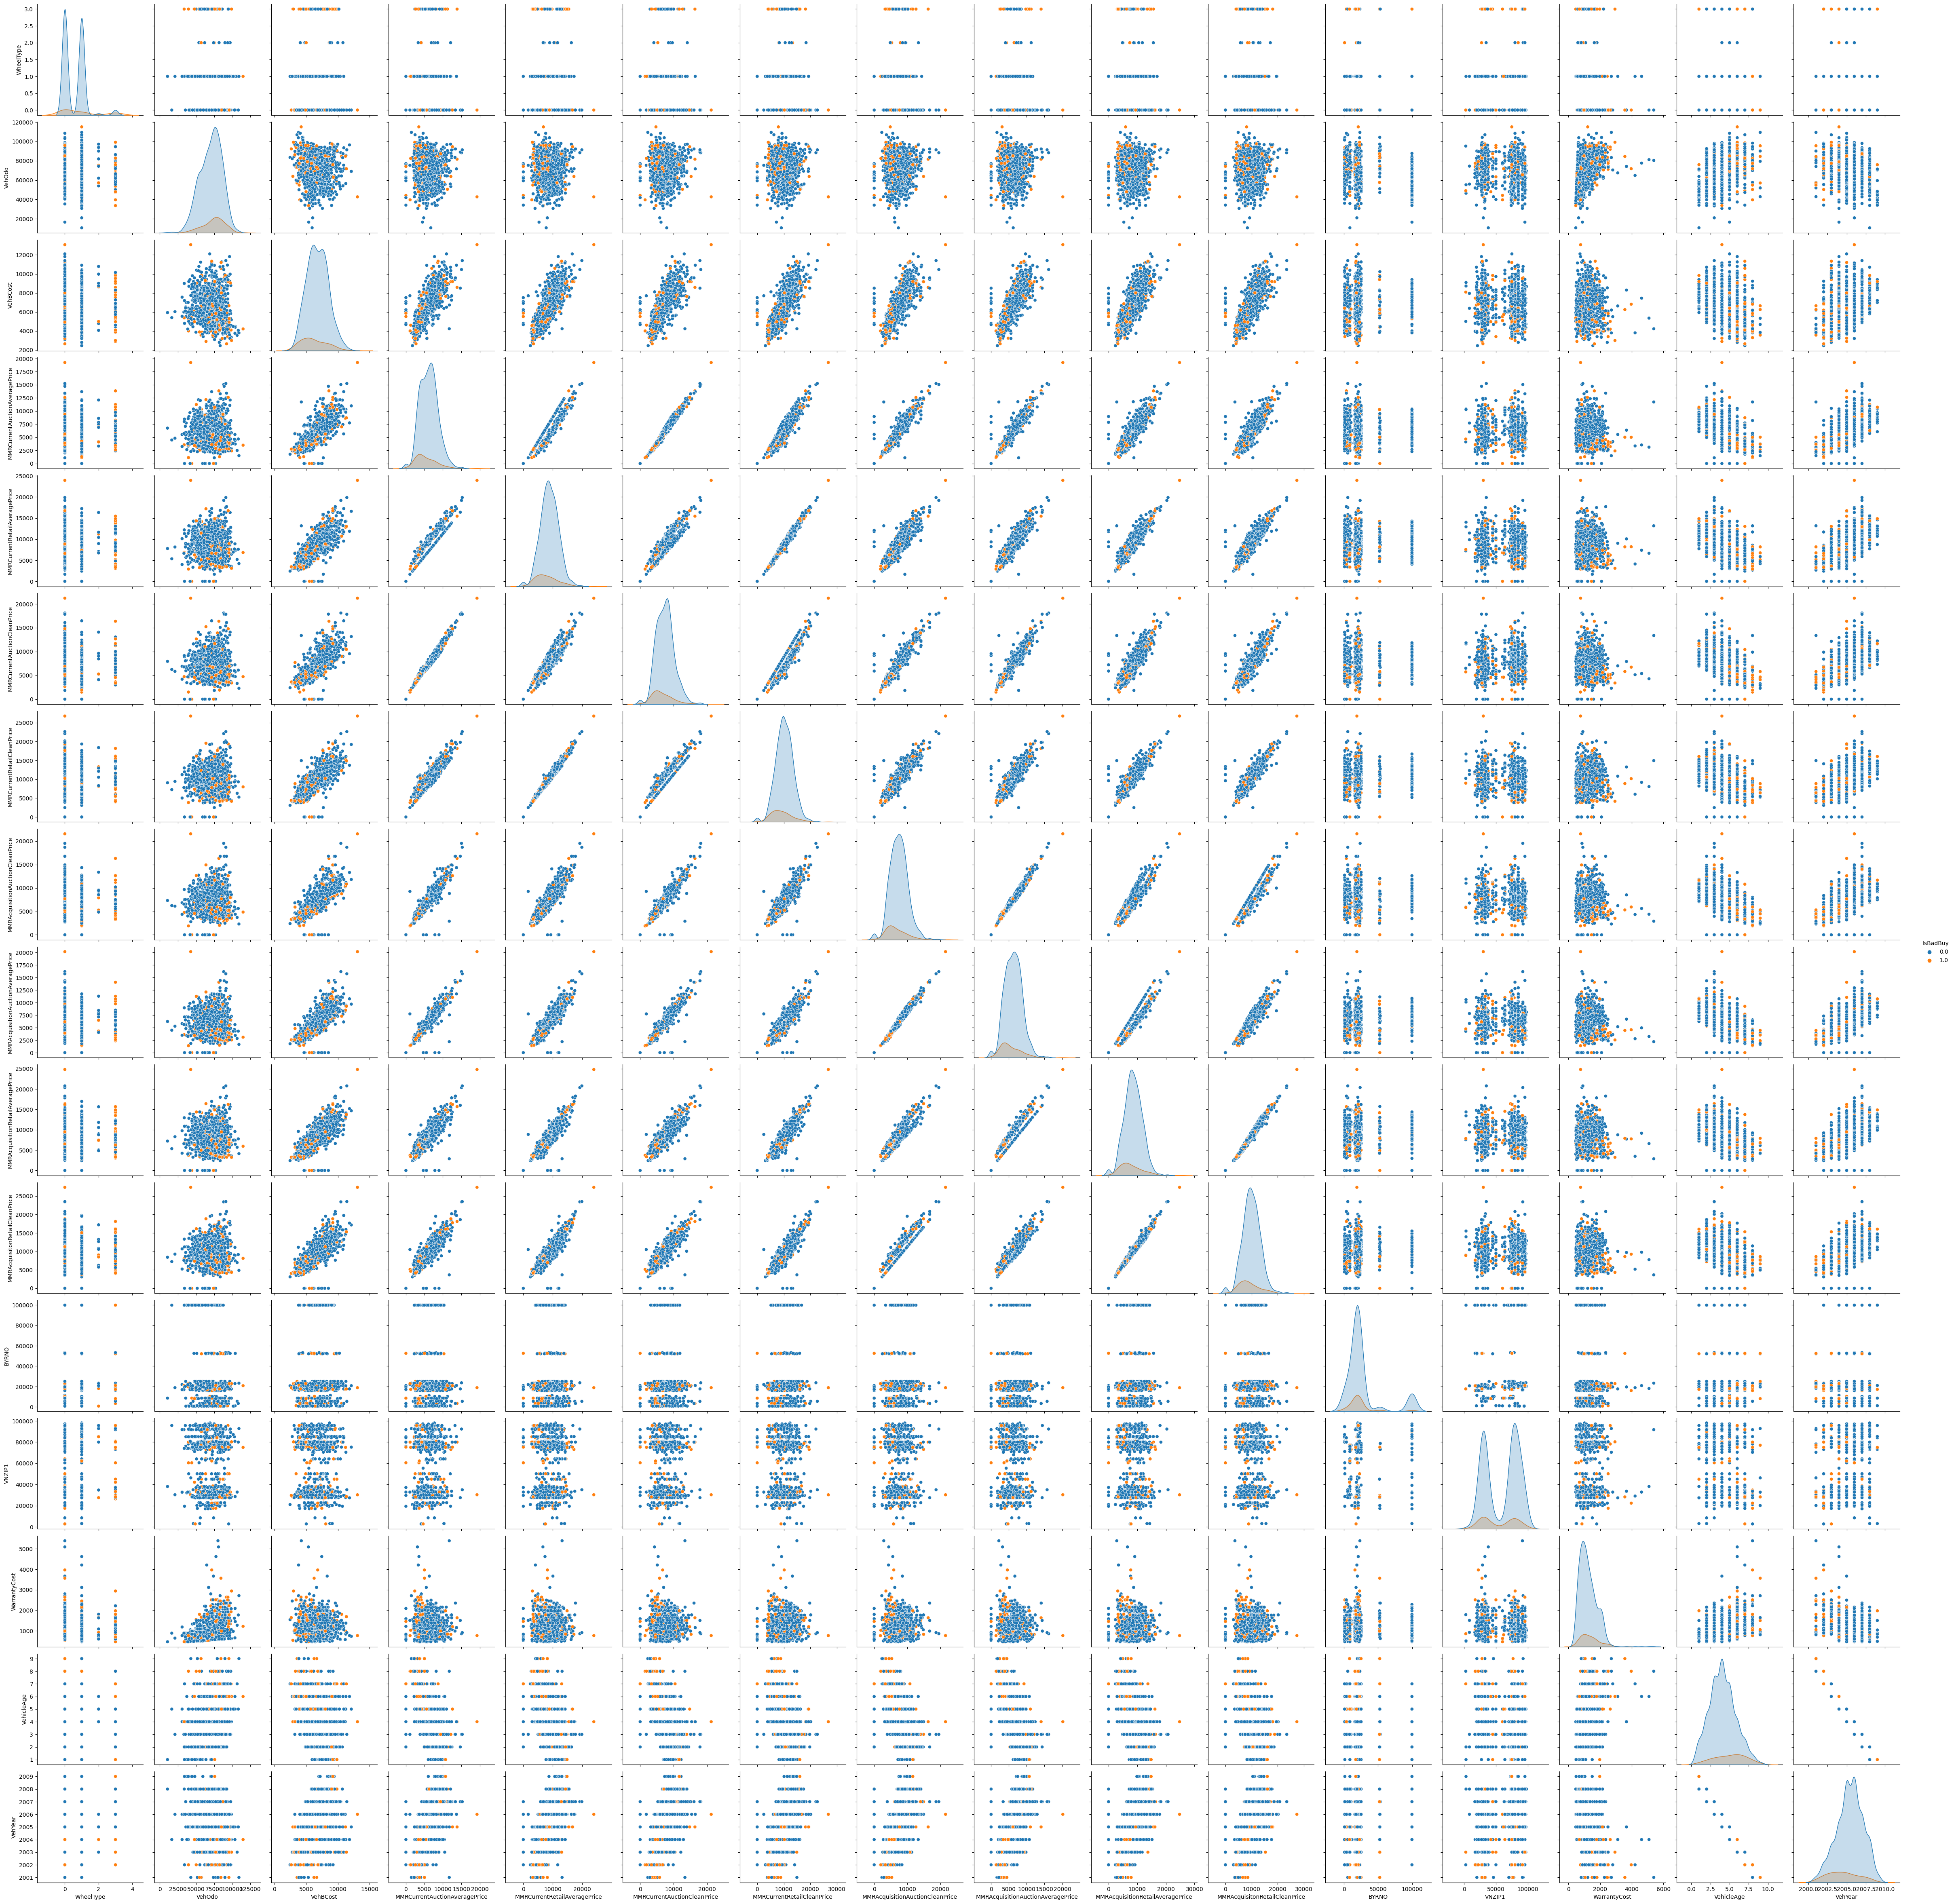

In [33]:
columns_to_plot= list(feature_importances_sorted.head(16).index)
_, data_subset = train_test_split(ohe_df, test_size=1000, random_state=42, stratify=ohe_df["IsBadBuy"])
sns.pairplot(data_subset, vars=columns_to_plot, hue="IsBadBuy", height=3)
plt.show()

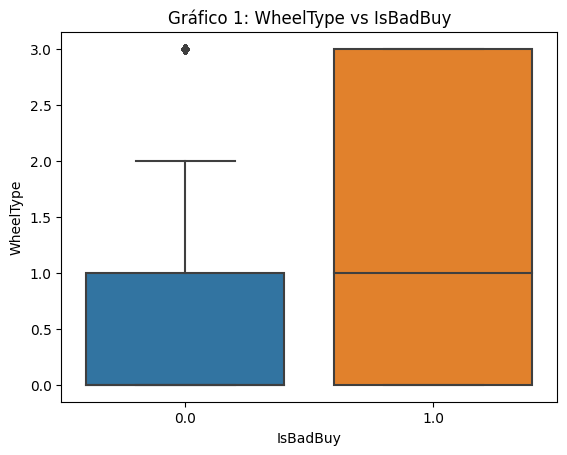

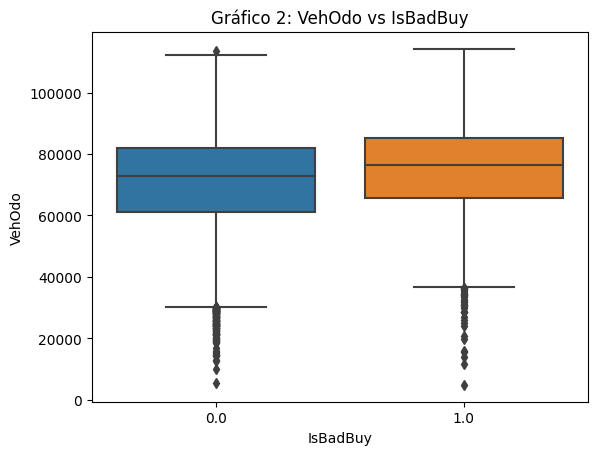

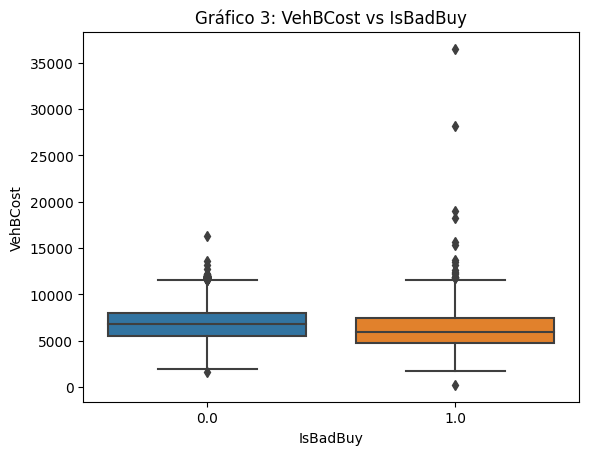

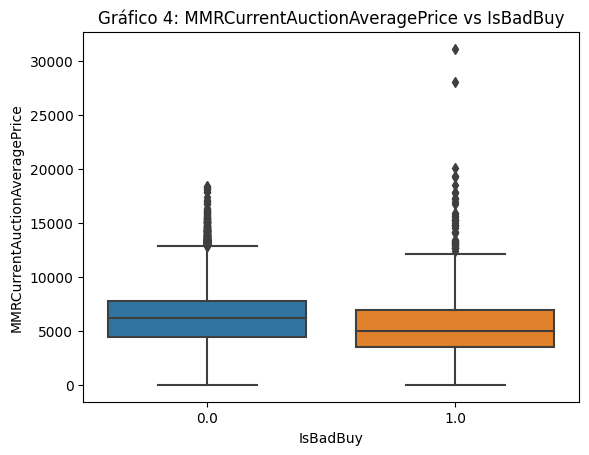

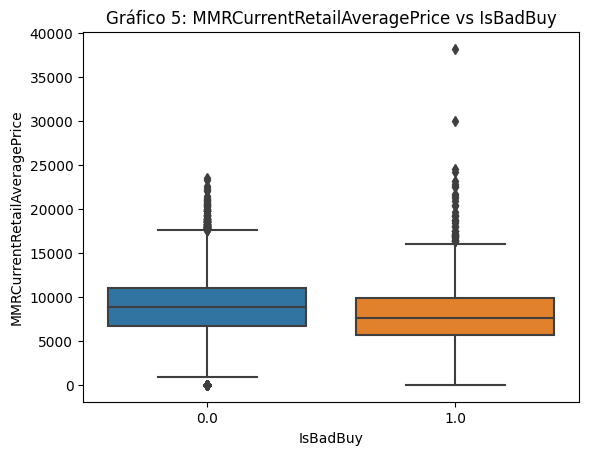

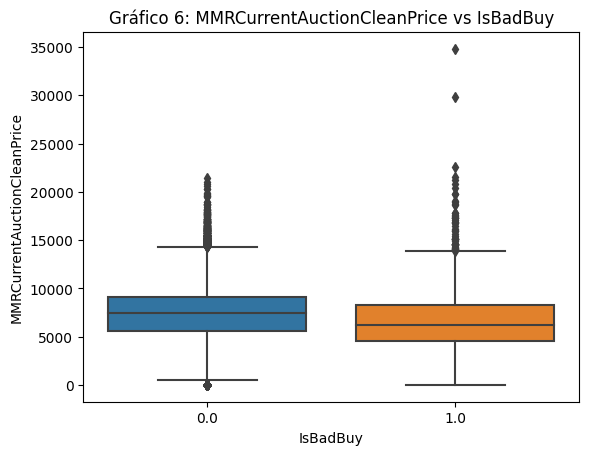

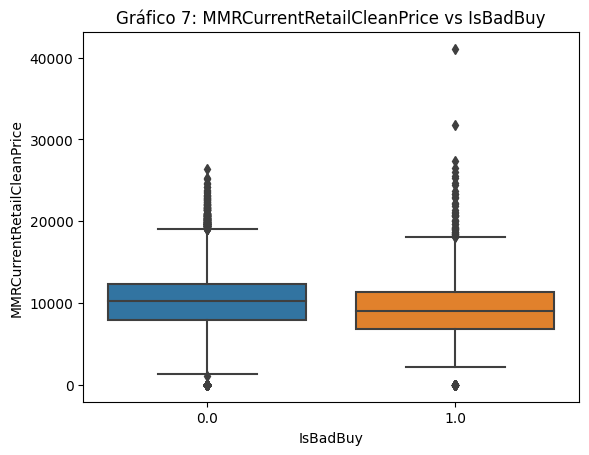

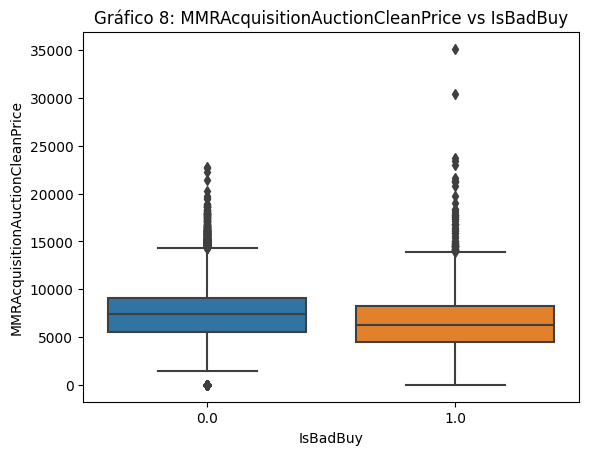

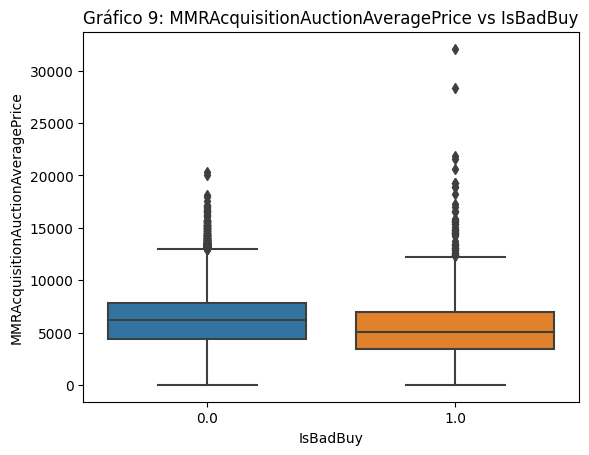

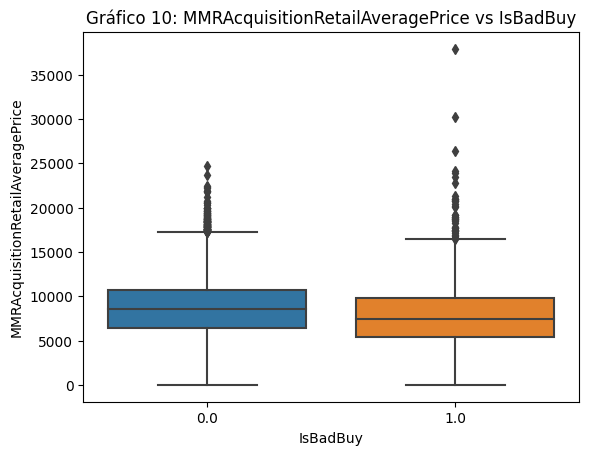

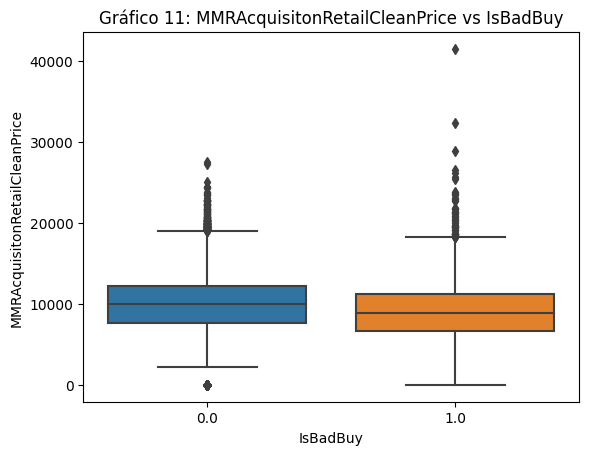

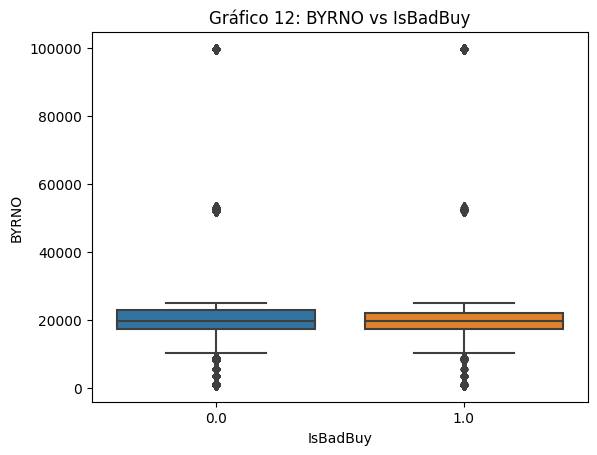

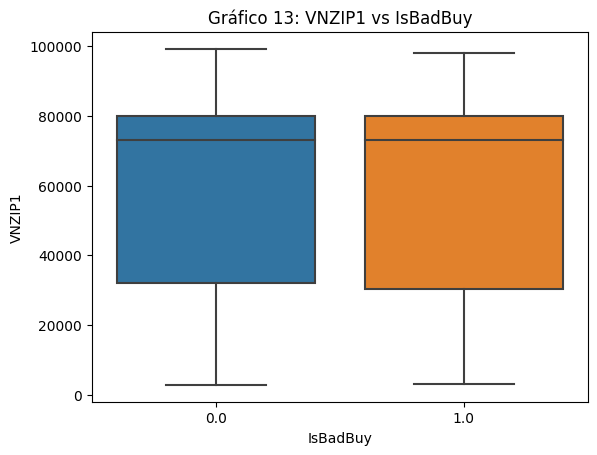

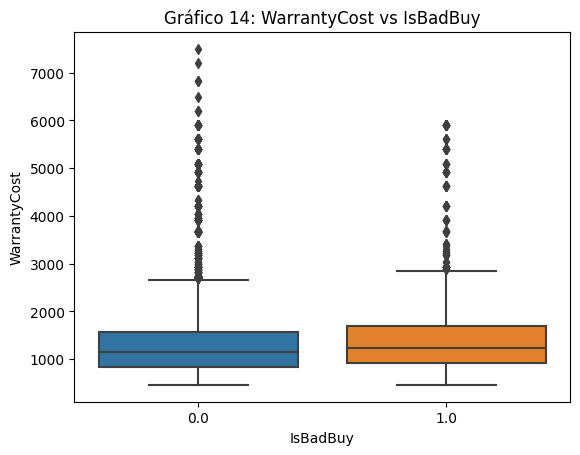

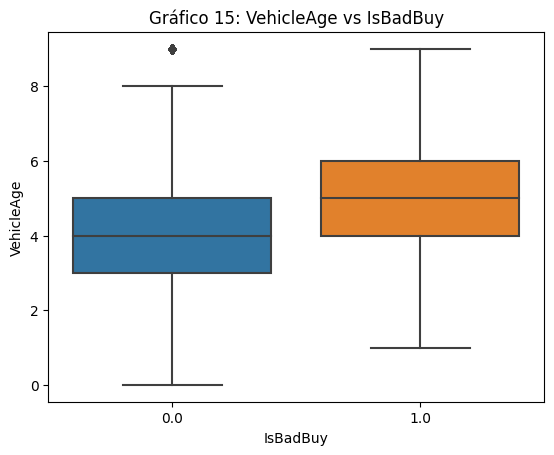

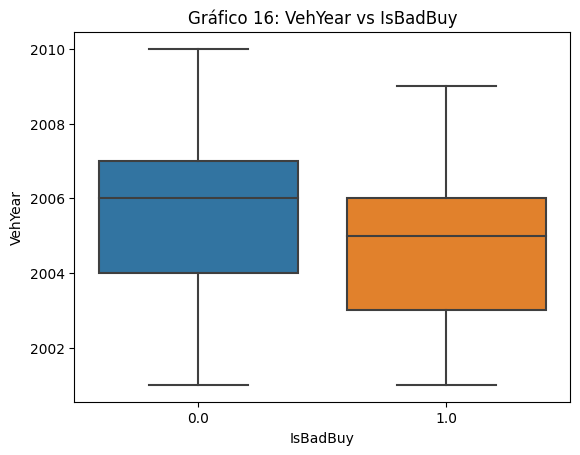

In [36]:
import seaborn as sns

# Crear un DataFrame con tus datos
data = pd.concat([X_val_reduced, y_train], axis=1)
num_graph = 1
# Para cada columna en X_val_reduced se comprara con la variable de salida IsBadBuy
for column in X_val_reduced.columns:
    # Crear un gráfico de caja
    ax=sns.boxplot(x='IsBadBuy', y=column, data=data)
    ax.set_title(f"Gráfico {num_graph}: {column} vs IsBadBuy")
    num_graph+=1
    
    plt.show()

## Análisis de Datos Gráficos
Se observa que la distribución de los datos en gráficos 2D, entre variables de entrada y/o salida, no permite una diferenciación clara para determinar si es una buena o mala compra.

En relación con los gráficos de cajas, diseñados para analizar la distribución de los datos con respecto a la variable de salida "IsBadBuy," se aprecia lo siguiente:

En el Gráfico 1, la distribución es asimétrica para el caso de malas compras (IsBadBuy=1), mostrando valores atípicos para buenas compras (IsBadBuy=0).

En el Gráfico 2, no se evidencia una diferencia clara entre las malas y buenas compras.

En el Gráfico 3, se observa que para los valores atípicos de malas compras, aquellos con un costo del coche para el comprador (incluyendo tasas de subasta) mayor a 20000 dólares son consideradas malas compras.

En el Gráfico 4, la distribución de datos para buenas y malas compras no es claramente diferenciable. Los valores atípicos indican que MMRCurrentAuctionAveragePrice, el precio promedio del coche en la subasta actual según el MMRA, superando los 20000 dólares, se clasifican como malas compras.

En cuanto al Gráfico 14, que representa WarrantyCost (el costo de la garantía del coche para el comprador), se observa que cuando el costo de la garantía es mayor a 6000 dólares, no será una mala compra. Para valores menores, no se observa una diferencia apreciable para definir si la compra es mala o no.

En el Gráfico 15, que compara VehicleAge vs IsBadBuy (donde VehicleAge es la edad del coche en años), se concluye que el 25% de los datos con una edad mayor a 5 años se consideran malas compras, mientras que el 25% de los datos con una edad menor a 4 años puede indicar una buena compra.

Finalmente, en el Gráfico 16 (VehYear vs IsBadBuy, donde VehYear es el año de fabricación del coche), se observa una distribución asimétrica en ambos casos de buenas y malas compras. Se puede concluir que a medida que un coche es más nuevo (fabricado después de 2006), las probabilidades de ser una mala compra disminuyen.

### Conclusión
El análisis de los datos gráficos sugiere que ciertas variables, como el costo total del coche y el año de fabricación, son indicadores significativos para predecir si una compra será clasificada como mala o buena. Estos insights pueden ser valiosos para la toma de decisiones y la implementación de estrategias que minimicen la probabilidad de adquirir un vehículo no satisfactorio.